In [73]:
#Extract labels from a text file
def Extract_labels(text_file_path)->list :
    '''function docstring'''
    with open(text_file_path,'r') as file :
        x = file.read().split(',')
    temp = list()
    for i in x :
        if 'category_id' in i :
            if '1' in i  :
                temp.append('Penguin')
            else :
                temp.append('Turltle')
    return temp

train_labels = Extract_labels('D:\\datasets\\Penguin_or_Turtle\\train_annotations.txt')
valid_labels = Extract_labels('D:\\datasets\\Penguin_or_Turtle\\valid_annotations.txt')

In [74]:
#Creating base folders
import os
def Make_dirs(*base_path)->None :
    '''function docstring'''
    temp = [*base_path]
    for i in temp :
        os.mkdir(f'{i}\\Penguin')
        os.mkdir(f'{i}\\Turtle')
        
Make_dirs('D:\\datasets\\Penguin_or_Turtle\\train','D:\\datasets\\Penguin_or_Turtle\\valid')

In [75]:
#Splitting photos into relevant folders
from shutil import copyfile
def Split_data(base_path,penguin_path,turtle_path,classes)->None :
    '''function docstring'''
    idx = 0
    for pic in os.listdir(base_path) :
        if pic == 'Penguin' or pic == 'Turtle' :
            continue
        else :
            if classes[idx] == 'Penguin' :
                copyfile(f'{base_path}\\{pic}',f'{penguin_path}\\{pic}')
                idx += 1
            else :
                copyfile(f'{base_path}\\{pic}',f'{turtle_path}\\{pic}')
                idx += 1
            
train_dir = 'D:\\datasets\\Penguin_or_Turtle\\train'
valid_dir = 'D:\\datasets\\Penguin_or_Turtle\\valid'
penguin_tr_path = 'D:\\datasets\\Penguin_or_Turtle\\train\\Penguin'
turtle_tr_path = 'D:\\datasets\\Penguin_or_Turtle\\train\\Turtle'
penguin_valid_path = 'D:\\datasets\\Penguin_or_Turtle\\valid\\Penguin'
turtle_valid_path = 'D:\\datasets\\Penguin_or_Turtle\\valid\\Turtle'
try :
    print('train datas are splitting , please wait')
    Split_data(train_dir,penguin_tr_path,turtle_tr_path,train_labels)
    print('train datas splited successfully')
    print('----------------------------------------')
    print('valid datas are splitting , please wait')
    Split_data(valid_dir,penguin_valid_path,turtle_valid_path,valid_labels)
    print('valid datas splited successfully')
    print('----------------------------------------')
    print('all done .')
except :
    print('something wrong when running the function !')

train datas are splitting , please wait
train datas splited successfully
----------------------------------------
valid datas are splitting , please wait
valid datas splited successfully
----------------------------------------
all done .


The order of photos :
Penguin_train
Turtle_train
Penguin_valid
Turtle_valid


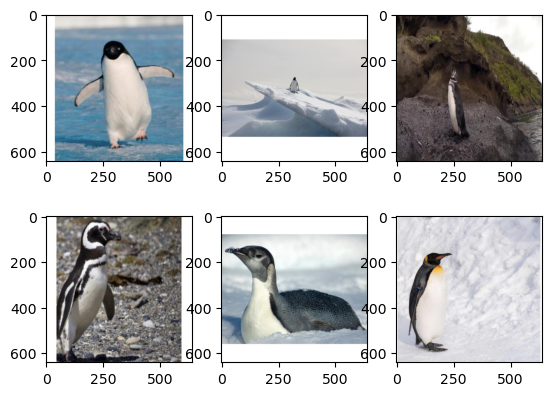

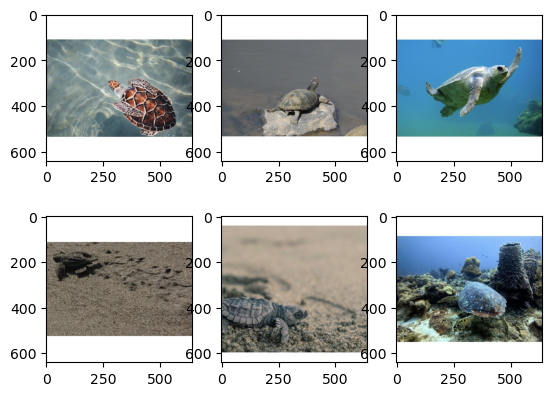

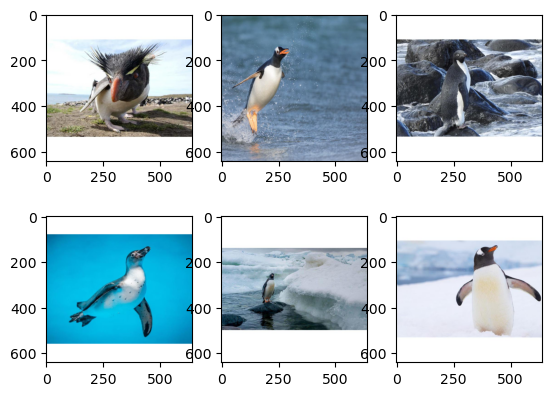

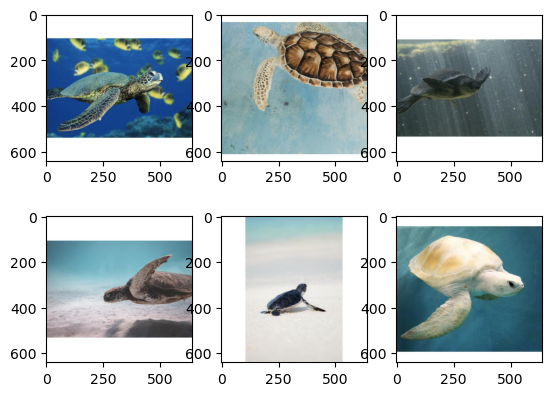

In [76]:
#Validating our work with random 6 train photos and random 6 valid photos .
from skimage.io import imread_collection , imshow_collection 
import random as rn
def Show(path,collection_name)->None :
    '''function docstring'''
    print(collection_name)
    selected = rn.sample(os.listdir(path)[:(len(os.listdir(path))-1)],6)
    photos = imread_collection([f'{path}\\{pic}' for pic in selected])
    imshow_collection(photos)
print('The order of photos :')
try :    
    Show(penguin_tr_path,'Penguin_train')
except :
    print('error for Penguin_train')
try :
    Show(turtle_tr_path,'Turtle_train')
except :
    print('error for Turtle_train')
try :
    Show(penguin_valid_path,'Penguin_valid')
except :
    print('error for Penguin_valid')
try :
    Show(turtle_valid_path,'Turtle_valid')
except :
    print('error for Turtle_valid')

In [77]:
#Creating generator instances
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
valid_gen = ImageDataGenerator(rescale=1/255)

In [78]:
#Generating our data
ready_train = train_gen.flow_from_directory(train_dir,target_size=(150,150),batch_size=50,class_mode='binary')
ready_valid = valid_gen.flow_from_directory(valid_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


In [89]:
#Building a model to train data . 
#We will use 'InceptionV3' .
from tensorflow.keras import models , layers ,Model
from tensorflow.keras.applications import InceptionV3
def Create_model() :
    '''function docstring'''
    inc = InceptionV3(include_top = False,input_shape=(150,150,3))
    for layer in inc.layers :
        layer.trainable = False
    last_layer = inc.get_layer('mixed7')
    last_output = last_layer.output
    x = layers.Flatten()(last_output)
    x = layers.Dense(512,activation='relu')(x)
    x = layers.Dense(1,activation='sigmoid')(x)
    model = Model(inc.input,x)
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [90]:
#Training 
history = Create_model().fit(ready_train,epochs=15,validation_data = ready_valid)

Epoch 1/15
10/10 [==============================] - 17s 2s/step - loss: 3.2799 - accuracy: 0.7460 - val_loss: 0.7235 - val_accuracy: 0.9167
Epoch 2/15
10/10 [==============================] - 14s 1s/step - loss: 0.6965 - accuracy: 0.8800 - val_loss: 0.5888 - val_accuracy: 0.9167
Epoch 3/15
10/10 [==============================] - 14s 1s/step - loss: 0.1663 - accuracy: 0.9500 - val_loss: 0.4830 - val_accuracy: 0.9028
Epoch 4/15
10/10 [==============================] - 14s 1s/step - loss: 0.1639 - accuracy: 0.9380 - val_loss: 0.4165 - val_accuracy: 0.9167
Epoch 5/15
10/10 [==============================] - 15s 1s/step - loss: 0.1285 - accuracy: 0.9540 - val_loss: 0.3384 - val_accuracy: 0.9167
Epoch 6/15
10/10 [==============================] - 15s 1s/step - loss: 0.2933 - accuracy: 0.9200 - val_loss: 0.4011 - val_accuracy: 0.9444
Epoch 7/15
10/10 [==============================] - 15s 1s/step - loss: 0.1104 - accuracy: 0.9720 - val_loss: 0.3275 - val_accuracy: 0.9306
Epoch 8/15
10/10 [==

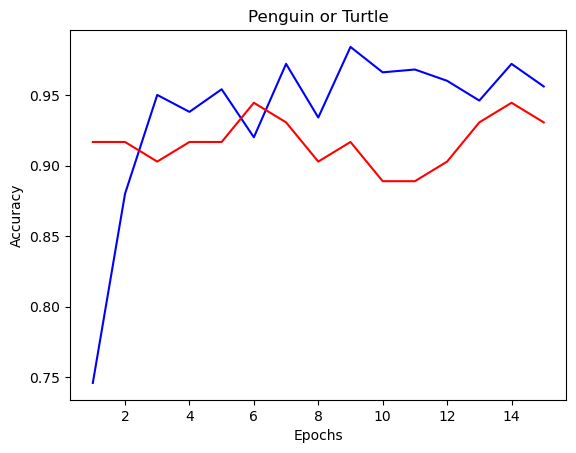

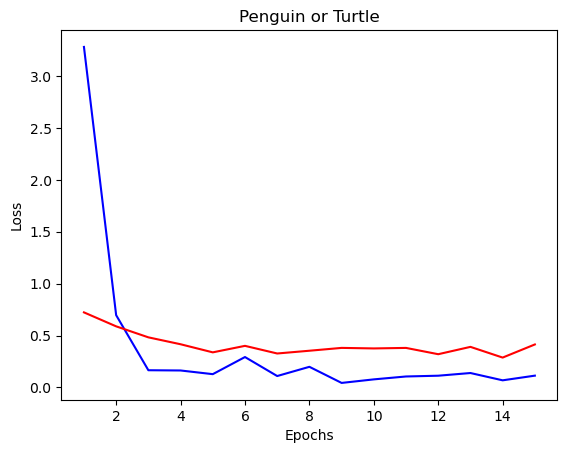

In [91]:
#Visualizing model performance
import matplotlib.pyplot as plt
epoch = range(1,16)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Penguin or Turtle')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Penguin or Turtle')
plt.show()